```{contents}
```


## Multiple Linear Regression

* In **Simple Linear Regression**, we model the relationship between **one independent variable** $X$ and a **dependent variable** $Y$.
* In **Multiple Linear Regression**, we extend this idea to **two or more independent variables**.

The equation is:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:

* $Y$ = dependent variable (target)
* $\beta_0$ = intercept (value of $Y$ when all $X$s are zero)
* $\beta_1, \beta_2, ..., \beta_n$ = coefficients for each feature
* $X_1, X_2, ..., X_n$ = independent variables (features)
* $\epsilon$ = error term (noise that the model cannot explain)

---

### Example Intuition

Suppose we want to predict **house price** based on:

* Size of the house ($X_1$)
* Number of bedrooms ($X_2$)
* Distance from city center ($X_3$)

Equation could look like:

$$
\text{Price} = 50,000 + 300 \times \text{Size} + 10,000 \times \text{Bedrooms} - 2,000 \times \text{Distance}
$$

Interpretation:

* For every extra unit of **size**, price increases by \$300.
* For every extra **bedroom**, price increases by \$10,000.
* For every km away from the city, price decreases by \$2,000.

---

### Assumptions of Multiple Linear Regression

MLR works best when these assumptions hold:

1. **Linearity** → relationship between predictors and target is linear.
2. **Independence** → features are independent of each other (low multicollinearity).
3. **Homoscedasticity** → variance of residuals is constant.
4. **Normality** → residuals (errors) should be normally distributed.

---

### Cost Function

The goal is to **minimize the error** between predictions and actual values.
We use **Mean Squared Error (MSE)**:

$$
J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Where:

* $m$ = number of data points
* $\hat{y}^{(i)}$ = predicted value
* $y^{(i)}$ = actual value

---

### Finding the Best Fit

* We use **Gradient Descent** or **Normal Equation** to estimate coefficients ($\beta$ values).
* Best fit line (or hyperplane in higher dimensions) minimizes the cost function.

---

### Visualization

Since more than 2 features are hard to plot directly, let’s see some cases:

#### Simple Regression (1 feature → line):

$$
Y = \beta_0 + \beta_1 X
$$

#### Multiple Regression with 2 features (2D plane → hyperplane in 3D):

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2
$$

The regression output becomes a **plane** instead of a line.



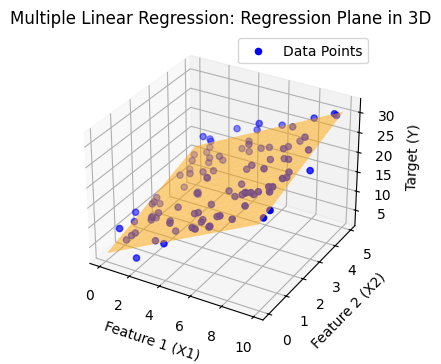

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = np.random.rand(100) * 5   # Feature 2
Y = 3 + 2*X1 + 1.5*X2 + np.random.randn(100) * 2  # Target with some noise

# Prepare features for regression
X = np.column_stack((X1, X2))

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Create a mesh grid for plotting regression plane
x1_range = np.linspace(X1.min(), X1.max(), 20)
x2_range = np.linspace(X2.min(), X2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model.intercept_ + model.coef_[0]*x1_grid + model.coef_[1]*x2_grid

# Plot 3D scatter and regression plane
plt.figure(figsize=(5, 4))
# ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')


# Scatter points
ax.scatter(X1, X2, Y, color='blue', label="Data Points")

# Regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='orange', alpha=0.5)

# Labels
ax.set_xlabel("Feature 1 (X1)")
ax.set_ylabel("Feature 2 (X2)")
ax.set_zlabel("Target (Y)")
ax.set_title("Multiple Linear Regression: Regression Plane in 3D")
ax.legend()

plt.show()


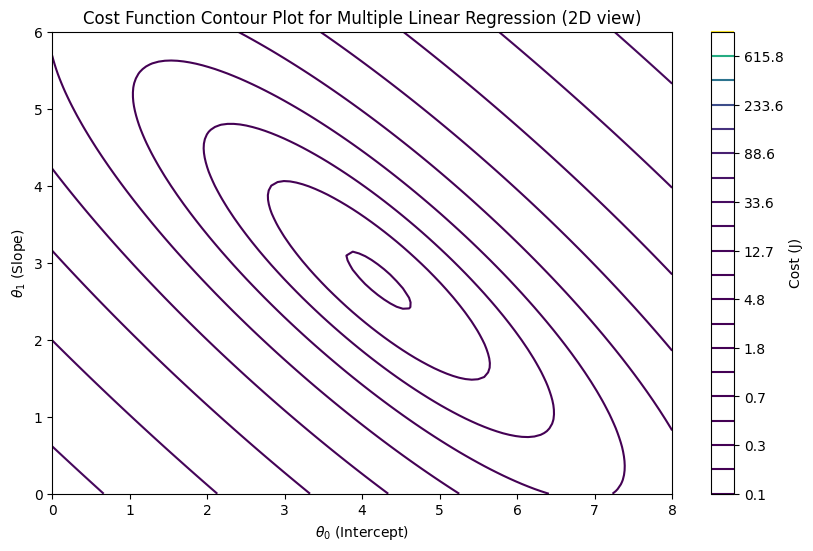

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define cost function for multiple linear regression (2 features for visualization)
def cost_function(theta0, theta1, X, y):
    m = len(y)
    predictions = theta0 + theta1 * X[:, 1]  # considering only one feature for visualization
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

# Generate synthetic dataset (house size vs price)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Add intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Create a grid of theta0, theta1 values
theta0_vals = np.linspace(0, 8, 100)
theta1_vals = np.linspace(0, 6, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute cost for each theta0, theta1
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        J_vals[i, j] = cost_function(t0, t1, X_b, y)

# Transpose for correct orientation in contour plot
J_vals = J_vals.T

# Plot cost function contours
plt.figure(figsize=(10, 6))
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-1, 3, 20), cmap="viridis")
plt.xlabel(r"$\theta_0$ (Intercept)")
plt.ylabel(r"$\theta_1$ (Slope)")
plt.title("Cost Function Contour Plot for Multiple Linear Regression (2D view)")
plt.colorbar(label="Cost (J)")
plt.show()


### What is a Contour Plot

A **contour plot** is a 2D plot that shows how a **3D surface** looks when you "slice it horizontally" at different heights (values).

* Imagine you have a mountain 🌄.
* If you cut the mountain at different altitudes and look from above, you will see rings (levels).
* Each **ring** represents points that have the same height.

That’s exactly what a contour plot does!

---

### Components of a Contour Plot

* **X-axis & Y-axis** → independent variables (e.g., parameters θ₀ and θ₁ in regression).
* **Contour lines (level curves)** → each line represents a constant value of a function (say cost J(θ)).
* **Colors or shading** → darker/lighter colors may show whether values are higher or lower.

---

### Example in Statistics / ML

In **Linear Regression**, we often visualize the **cost function**:

$$
J(\theta_0, \theta_1)
$$

* This is a 3D surface shaped like a bowl (convex).
* Instead of plotting the 3D bowl, we use **contour plots**.
* The innermost contour (center) represents the **global minimum** (lowest cost).
* Gradient descent moves step by step **across the contours** towards the center.

---

### Analogy

Think of a **topographic map** 🗺️ (used in hiking):

* The lines show elevation levels.
* Closer lines = steep slope.
* Wider lines = flat surface.
* The deepest valley point = **global minimum**.

In machine learning:

* θ₀ and θ₁ are the "coordinates" (like longitude & latitude).
* J(θ) (cost) is the "elevation".
* Gradient descent is like rolling a ball downhill until it reaches the lowest valley.

